# ニューラルネットワーク全体像

### ニューラルネットワーク（NN）でできること

#### 回帰
- 結果予想
 - 売上予想
 - 株価予想
- ランキング
 - 競馬順位予想
 - 人気順位予想

#### 分類
- 猫の写真識別
- 手書き文字認識
- 花の種類分類


### 深層学習の実用例
- 自動売買（トレード）
- チャットボット
- 翻訳
- 音声解釈
- 囲碁、将棋AI

# Section1：入力層～中間層

ニューラルネットワークの全体として、入力層から中間層にデータが変換されながら渡されて、活性化関数を通して出力層へデータが出力される。


入力層はニューラルネットワークに何かしらの数値を渡される。 \
例では４つの数値を渡される図となっている。 \
受け取る場所をノードという。 \
入力層から中間層へ渡すときに重みを準備する。入力ノード毎に重要な項目であれば重みが大きくなり、重要でない項目の重みは小さくなる。 \
重みだけで表現できない場合にバイアスで調整する。 \
ニューラルネットワークでは、重みとバイアスを、学習によって変化させる。

中間層の出力は、入力層の計算結果（総入力）に対して、活性化関数を通すと得られる。 \
中間層のの出力は次のネットワークの入力値となる。

## 入力層の設計

- 入力層として取るべきでないデータ
 - 欠損値が多いデータ
 - 誤差の大きいデータ
 - 出力そのもの、出力を加工した情報
 - 連続性のないデータ（背番号とか）
 - 無意味な数が割り当てられているデータ
- 欠損地の扱い
 - ゼロで詰める
 - 欠損値を含む集合を除外する
 - 入力として採用しない
- データの結合
- 数値の正規化・正則化

## ハンズオン　（1_1_forward_propagation.ipynb）

In [2]:
import sys, os
sys.path.append(os.pardir)
import numpy as np

In [3]:
# シグモイド関数（ロジスティック関数）
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# ReLU関数
def relu(x):
    return np.maximum(0, x)


# 出力層の活性化関数
# ソフトマックス関数
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x) # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x))

# 平均二乗誤差
def mean_squared_error(d, y):
    return np.mean(np.square(d - y)) / 2


# クロスエントロピー
def cross_entropy_error(d, y):
    if y.ndim == 1:
        d = d.reshape(1, d.size)
        y = y.reshape(1, y.size)
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if d.size == y.size:
        d = d.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), d] + 1e-7)) / batch_size

def print_vec(text, vec):
    print("*** " + text + " ***")
    print(vec)
    #print("shape: " + str(x.shape))
    print("")


### 順伝播（単層・単ユニット）

In [4]:
# 順伝播（単層・単ユニット）

# 重み
W = np.array([[0.1], [0.2]])

## 試してみよう_配列の初期化
#W = np.zeros(2)
#W = np.ones(2)
#W = np.random.rand(2)
#W = np.random.randint(5, size=(2))

print_vec("重み", W)


# バイアス
b = 0.5

## 試してみよう_数値の初期化
#b = np.random.rand() # 0~1のランダム数値
#b = np.random.rand() * 10 -5  # -5~5のランダム数値

print_vec("バイアス", b)

# 入力値
x = np.array([2, 3])
print_vec("入力", x)


# 総入力
u = np.dot(x, W) + b
print_vec("総入力", u)

# 中間層出力
z = relu(u)
print_vec("中間層出力", z)


*** 重み ***
[[0.1]
 [0.2]]

*** バイアス ***
0.5

*** 入力 ***
[2 3]

*** 総入力 ***
[1.3]

*** 中間層出力 ***
[1.3]



### 順伝播（単層・複数ユニット）

In [5]:
# 順伝播（単層・複数ユニット）

# 重み
W = np.array([
    [0.1, 0.2, 0.3], 
    [0.2, 0.3, 0.4], 
    [0.3, 0.4, 0.5],
    [0.4, 0.5, 0.6]
])

## 試してみよう_配列の初期化
#W = np.zeros((4,3))
#W = np.ones((4,3))
#W = np.random.rand(4,3)
#W = np.random.randint(5, size=(4,3))

print_vec("重み", W)

# バイアス
b = np.array([0.1, 0.2, 0.3])
print_vec("バイアス", b)

# 入力値
x = np.array([1.0, 5.0, 2.0, -1.0])
print_vec("入力", x)


#  総入力
u = np.dot(x, W) + b
print_vec("総入力", u)

# 中間層出力
z = sigmoid(u)
print_vec("中間層出力", z)


*** 重み ***
[[0.1 0.2 0.3]
 [0.2 0.3 0.4]
 [0.3 0.4 0.5]
 [0.4 0.5 0.6]]

*** バイアス ***
[0.1 0.2 0.3]

*** 入力 ***
[ 1.  5.  2. -1.]

*** 総入力 ***
[1.4 2.2 3. ]

*** 中間層出力 ***
[0.80218389 0.90024951 0.95257413]



### 順伝播（3層・複数ユニット）

In [6]:
# 順伝播（3層・複数ユニット）

# ウェイトとバイアスを設定
# ネートワークを作成
def init_network():
    print("##### ネットワークの初期化 #####")
    network = {}
    
    #試してみよう
    #_各パラメータのshapeを表示
    #_ネットワークの初期値ランダム生成
    
    network['W1'] = np.array([
        [0.1, 0.3, 0.5],
        [0.2, 0.4, 0.6]
    ])
    network['W2'] = np.array([
        [0.1, 0.4],
        [0.2, 0.5],
        [0.3, 0.6]
    ])
    network['W3'] = np.array([
        [0.1, 0.3],
        [0.2, 0.4]
    ])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['b2'] = np.array([0.1, 0.2])
    network['b3'] = np.array([1, 2])

    print_vec("重み1", network['W1'] )
    print_vec("重み2", network['W2'] )
    print_vec("重み3", network['W3'] )
    print_vec("バイアス1", network['b1'] )
    print_vec("バイアス2", network['b2'] )
    print_vec("バイアス3", network['b3'] )

    return network

# プロセスを作成
# x：入力値
def forward(network, x):
    
    print("##### 順伝播開始 #####")

    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    # 1層の総入力
    u1 = np.dot(x, W1) + b1
    
    # 1層の総出力
    z1 = relu(u1)
    
    # 2層の総入力
    u2 = np.dot(z1, W2) + b2
    
    # 2層の総出力
    z2 = relu(u2)

    # 出力層の総入力
    u3 = np.dot(z2, W3) + b3
    
    # 出力層の総出力
    y = u3
    
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", z1)
    print("出力合計: " + str(np.sum(z1)))

    return y, z1, z2

# 入力値
x = np.array([1., 2.])
print_vec("入力", x)

# ネットワークの初期化
network =  init_network()

y, z1, z2 = forward(network, x)

*** 入力 ***
[1. 2.]

##### ネットワークの初期化 #####
*** 重み1 ***
[[0.1 0.3 0.5]
 [0.2 0.4 0.6]]

*** 重み2 ***
[[0.1 0.4]
 [0.2 0.5]
 [0.3 0.6]]

*** 重み3 ***
[[0.1 0.3]
 [0.2 0.4]]

*** バイアス1 ***
[0.1 0.2 0.3]

*** バイアス2 ***
[0.1 0.2]

*** バイアス3 ***
[1 2]

##### 順伝播開始 #####
*** 総入力1 ***
[0.6 1.3 2. ]

*** 中間層出力1 ***
[0.6 1.3 2. ]

*** 総入力2 ***
[1.02 2.29]

*** 出力1 ***
[0.6 1.3 2. ]

出力合計: 3.9


### 多クラス分類（2-3-4ネットワーク）

In [7]:
# 多クラス分類
# 2-3-4ネットワーク

# ！試してみよう_ノードの構成を 3-5-4 に変更してみよう

# ウェイトとバイアスを設定
# ネートワークを作成
def init_network():
    print("##### ネットワークの初期化 #####")

    #試してみよう
    #_各パラメータのshapeを表示
    #_ネットワークの初期値ランダム生成

    network = {}
    network['W1'] = np.array([
        [0.1, 0.3, 0.5],
        [0.2, 0.4, 0.6]
    ])
    network['W2'] = np.array([
        [0.1, 0.4, 0.7, 1.0],
        [0.2, 0.5, 0.8, 1.1],
        [0.3, 0.6, 0.9, 1.2]
    ])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['b2'] = np.array([0.1, 0.2, 0.3, 0.4])
    
    print_vec("重み1", network['W1'] )
    print_vec("重み2", network['W2'] )
    print_vec("バイアス1", network['b1'] )
    print_vec("バイアス2", network['b2'] )

    return network

# プロセスを作成
# x：入力値
def forward(network, x):
    
    print("##### 順伝播開始 #####")
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    
    # 1層の総入力
    u1 = np.dot(x, W1) + b1

    # 1層の総出力
    z1 = relu(u1)

    # 2層の総入力
    u2 = np.dot(z1, W2) + b2
    
    # 出力値
    y = softmax(u2)
    
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", y)
    print("出力合計: " + str(np.sum(y)))
        
    return y, z1

## 事前データ
# 入力値
x = np.array([1., 2.])

# 目標出力
d = np.array([0, 0, 0, 1])

# ネットワークの初期化
network =  init_network()

# 出力
y, z1 = forward(network, x)

# 誤差
loss = cross_entropy_error(d, y)

## 表示
print("\n##### 結果表示 #####")
print_vec("出力", y)
print_vec("訓練データ", d)
print_vec("誤差",  loss)



##### ネットワークの初期化 #####
*** 重み1 ***
[[0.1 0.3 0.5]
 [0.2 0.4 0.6]]

*** 重み2 ***
[[0.1 0.4 0.7 1. ]
 [0.2 0.5 0.8 1.1]
 [0.3 0.6 0.9 1.2]]

*** バイアス1 ***
[0.1 0.2 0.3]

*** バイアス2 ***
[0.1 0.2 0.3 0.4]

##### 順伝播開始 #####
*** 総入力1 ***
[0.6 1.3 2. ]

*** 中間層出力1 ***
[0.6 1.3 2. ]

*** 総入力2 ***
[1.02 2.29 3.56 4.83]

*** 出力1 ***
[0.01602796 0.05707321 0.20322929 0.72366954]

出力合計: 1.0

##### 結果表示 #####
*** 出力 ***
[0.01602796 0.05707321 0.20322929 0.72366954]

*** 訓練データ ***
[0 0 0 1]

*** 誤差 ***
0.3234202933601941



### 回帰（2-3-2ネットワーク）

In [8]:
# 回帰
# 2-3-2ネットワーク

# ！試してみよう_ノードの構成を 3-5-4 に変更してみよう

# ウェイトとバイアスを設定
# ネートワークを作成
def init_network():
    print("##### ネットワークの初期化 #####")

    network = {}
    network['W1'] = np.array([
        [0.1, 0.3, 0.5],
        [0.2, 0.4, 0.6]
    ])
    network['W2'] = np.array([
        [0.1, 0.4],
        [0.2, 0.5],
        [0.3, 0.6]
    ])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['b2'] = np.array([0.1, 0.2])
    
    print_vec("重み1", network['W1'] )
    print_vec("重み2", network['W2'] )
    print_vec("バイアス1", network['b1'] )
    print_vec("バイアス2", network['b2'] )

    return network

# プロセスを作成
def forward(network, x):
    print("##### 順伝播開始 #####")
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    # 隠れ層の総入力
    u1 = np.dot(x, W1) + b1
    # 隠れ層の総出力
    z1 = relu(u1)
    # 出力層の総入力
    u2 = np.dot(z1, W2) + b2
    # 出力層の総出力
    y = u2
    
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", y)
    print("出力合計: " + str(np.sum(z1)))
    
    return y, z1

# 入力値
x = np.array([1., 2.])
network =  init_network()
y, z1 = forward(network, x)
# 目標出力
d = np.array([2., 4.])
# 誤差
loss = mean_squared_error(d, y)
## 表示
print("\n##### 結果表示 #####")
print_vec("中間層出力", z1)
print_vec("出力", y)
print_vec("訓練データ", d)
print_vec("誤差",  loss)


##### ネットワークの初期化 #####
*** 重み1 ***
[[0.1 0.3 0.5]
 [0.2 0.4 0.6]]

*** 重み2 ***
[[0.1 0.4]
 [0.2 0.5]
 [0.3 0.6]]

*** バイアス1 ***
[0.1 0.2 0.3]

*** バイアス2 ***
[0.1 0.2]

##### 順伝播開始 #####
*** 総入力1 ***
[0.6 1.3 2. ]

*** 中間層出力1 ***
[0.6 1.3 2. ]

*** 総入力2 ***
[1.02 2.29]

*** 出力1 ***
[1.02 2.29]

出力合計: 3.9

##### 結果表示 #####
*** 中間層出力 ***
[0.6 1.3 2. ]

*** 出力 ***
[1.02 2.29]

*** 訓練データ ***
[2. 4.]

*** 誤差 ***
0.9711249999999999



## 2値分類（2-3-1ネットワーク）

In [9]:
# 2値分類
# 2-3-1ネットワーク

# ！試してみよう_ノードの構成を 5-10-1 に変更してみよう

# ウェイトとバイアスを設定
# ネートワークを作成
def init_network():
    print("##### ネットワークの初期化 #####")

    network = {}
    network['W1'] = np.array([
        [0.1, 0.3, 0.5],
        [0.2, 0.4, 0.6]
    ])
    network['W2'] = np.array([
        [0.2],
        [0.4],
        [0.6]
    ])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['b2'] = np.array([0.1])
    return network


# プロセスを作成
def forward(network, x):
    print("##### 順伝播開始 #####")
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']    

    # 隠れ層の総入力
    u1 = np.dot(x, W1) + b1
    # 隠れ層の総出力
    z1 = relu(u1)
    # 出力層の総入力
    u2 = np.dot(z1, W2) + b2
    # 出力層の総出力
    y = sigmoid(u2)
            
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", y)
    print("出力合計: " + str(np.sum(z1)))

    return y, z1


# 入力値
x = np.array([1., 2.])
# 目標出力
d = np.array([1])
network =  init_network()
y, z1 = forward(network, x)
# 誤差
loss = cross_entropy_error(d, y)

## 表示
print("\n##### 結果表示 #####")
print_vec("中間層出力", z1)
print_vec("出力", y)
print_vec("訓練データ", d)
print_vec("誤差",  loss)

##### ネットワークの初期化 #####
##### 順伝播開始 #####
*** 総入力1 ***
[0.6 1.3 2. ]

*** 中間層出力1 ***
[0.6 1.3 2. ]

*** 総入力2 ***
[1.94]

*** 出力1 ***
[0.87435214]

出力合計: 3.9

##### 結果表示 #####
*** 中間層出力 ***
[0.6 1.3 2. ]

*** 出力 ***
[0.87435214]

*** 訓練データ ***
[1]

*** 誤差 ***
0.13427195993720972



## 確認テスト
#### P5

問）ディープラーニングは、結局何をやろうとしているか2行以内で述べよ。

答）入力値から、何らかの目的のデータを出力する。

また、次の中のどの値の最適化が最終目的か。全て選べ。
①入力値[ X]  \
②出力値[ Y] \
③重み[W] \
④バイアス[b] \
⑤総入力[u]  \
⑥中間層入力[ z] \
⑦学習率[ρ] \


答）③、④

#### P7

問）次のネットワークを紙にかけ。 \
入力層︓２ノード１層 \
中間層︓３ノード２層 \
出力層︓１ノード１層

答）

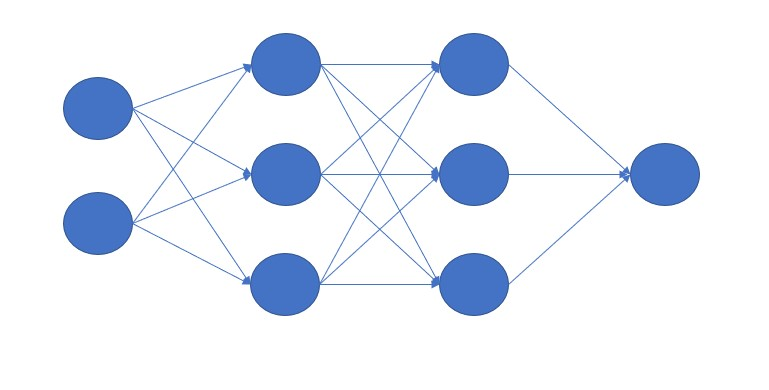

In [2]:
from IPython.display import Image
Image("./Section1_確認テスト2.jpg")

#### P13

問）この図式に動物分類の実例を入れてみよう。

答）

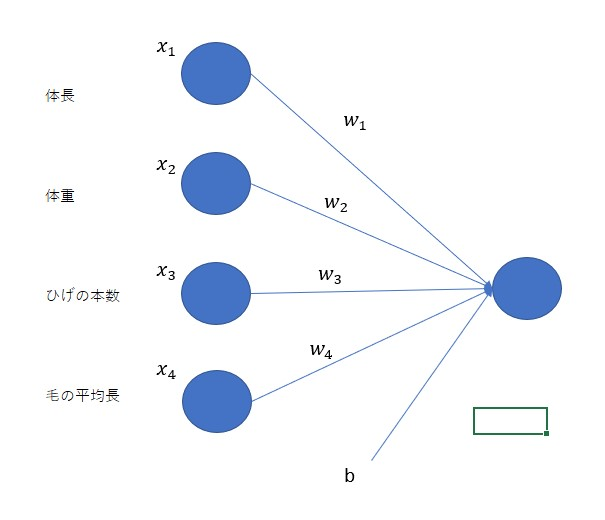

In [12]:
Image("./Section1_確認テスト13.jpg")

#### P15

\begin{aligned}
u &= w_1 x_1 + w_2 x_2 + w_3 x_3 + w_4 x_4 + b \\[6px]
&= Wx + b
\end{aligned}

この数式をPythonで書け。

答）

In [11]:
import numpy as np

w1=1
w2=1
w3=1
w4=1

x1=1
x2=1
x3=1
x4=1

b = 1

W = np.array([[w1],[w2],[w3],[w4]])
x = np.array([[x1],[x2],[x3],[x4]])

u = np.dot(W.T ,x) + b
print(u)

[[5]]


#### P17

問）1-1のファイルから中間層の出力を定義しているソースを抜き出せ。

答）

| ニューラルネットワーク | ソース |
 :---- | :---- |
| 順伝播（単層・単ユニット) | z = functions.relu(u) |
|  順伝播（単層・複数ユニット) | z = functions.sigmoid(u) |
| 順伝播（3層・複数ユニット)  | z2 = functions.relu(u2) | 
| 多クラス分類（2-3-4ネットワーク）|  u2 = np.dot(z1, W2) + b2
| 回帰（2-3-2ネットワーク） | z1 = functions.relu(u1) |
| 2値分類（2-3-1ネットワーク） | z1 = functions.relu(u1) |